#TASK 1-
Use classification technique for prediction of Graduate Admissions from an Indian perspective.

Both Regression and classification techniques are performed for the following dataset.

In [ ]:
!pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
pd.options.display.max_columns=None
plt.rcParams["figure.figsize"] = (10,5)
import time

# Load all the librarires
# for data manipulation and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score

#for model interpretation
#import shap

# deployment module
#import streamlit as st

print("All Libraries are imported")


All Libraries are imported


## Problem - Regression 
## Aim - To estimate the probability of admission.

In [ ]:
import pandas_profiling as pp


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/internsavy/Admission_Predict.csv')

In [ ]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [ ]:
df.drop(columns=['Serial No.'],axis=1,inplace=True)

In [ ]:
df.shape

(400, 8)

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit   
count  400.000000  400.000000        400.000000  
mean     8.598925    0.547500          0.724350  
std      0.596317    0.498362          0.142609  
min      6.800000    0.000000          0.340000  
25%      8.170000    0.000000          0.640000  
50%      8.610000    1.000000          0.730000  
75%      9.062500    1.000000          0.830000  
max      9.920000    1.000000          0.970000

In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

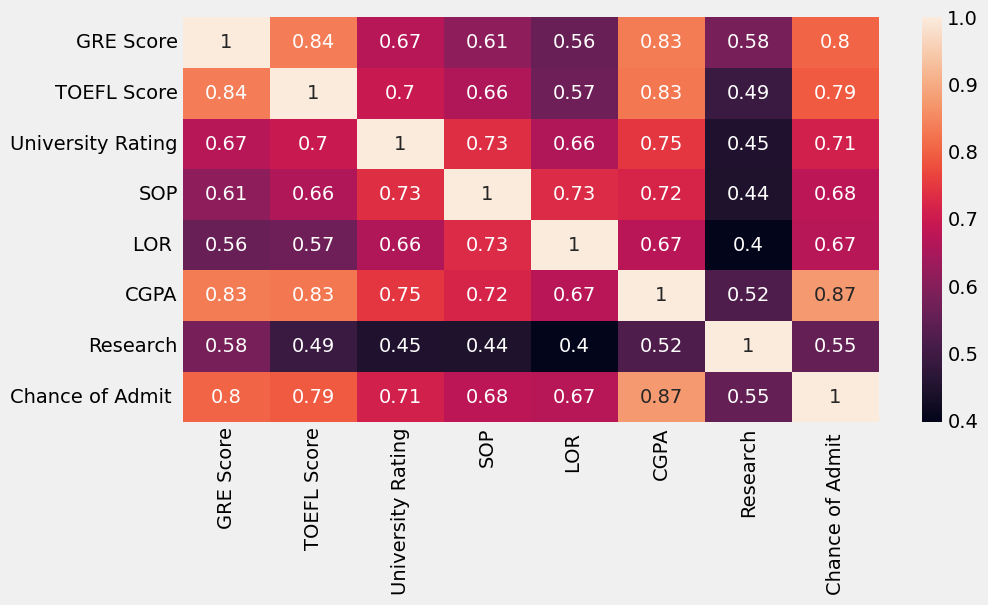

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.675732  
LOR                1.000000  0.670211  0.396859          0.669889  
CGPA               0.670211  1.000000  0.521654          0.873289  
Research           0.396859  0.521654  1.000000          0.553202  
Chance of Admit    0.669889  0.873289  0.553202          1.000000

In [ ]:
cat=['University Rating','Research']

In [ ]:
num=list(df.drop(columns=cat,axis=1).columns)

In [ ]:
num,cat

(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit '],
 ['University Rating', 'Research'])

In [ ]:
for i in cat:
  print(i,':\n',df[i].unique(),'\n\n')

University Rating :
 [4 3 2 5 1] 


Research :
 [1 0] 




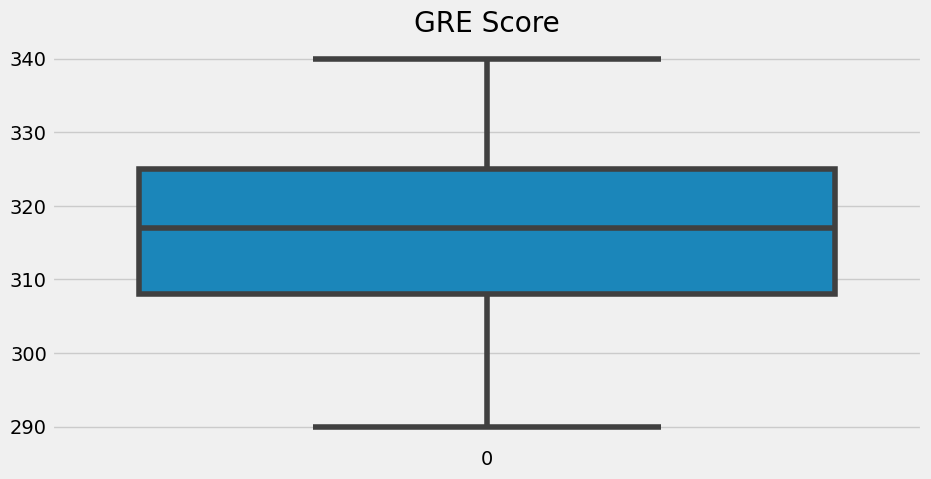

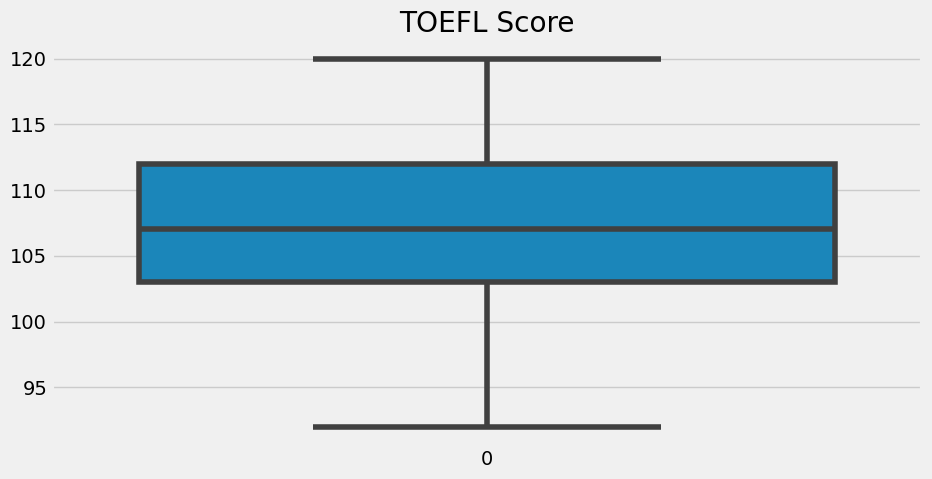

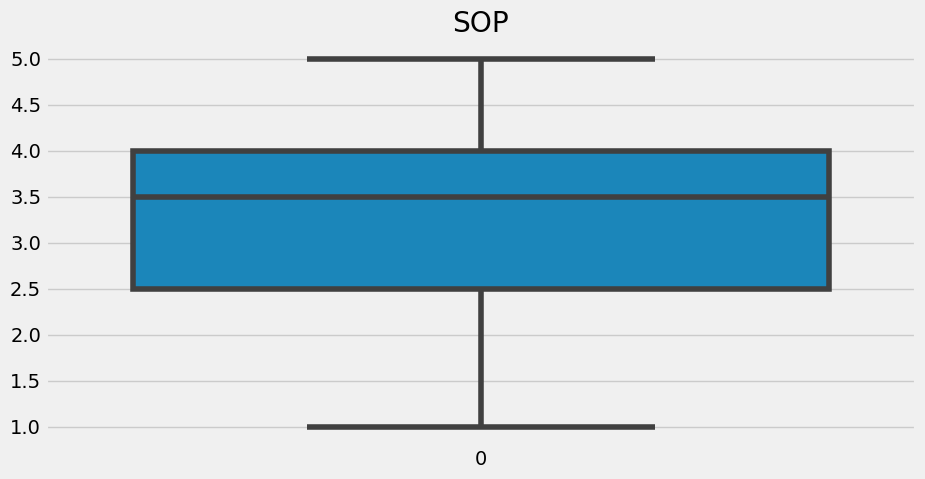

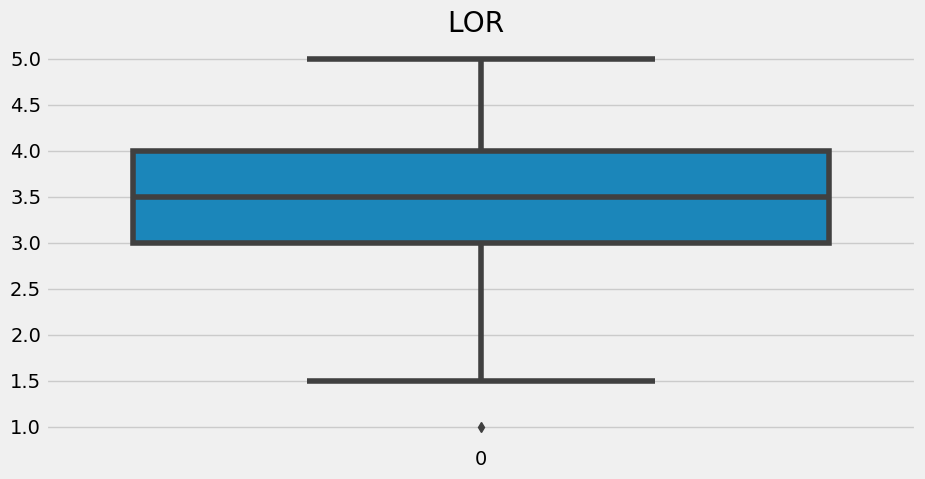

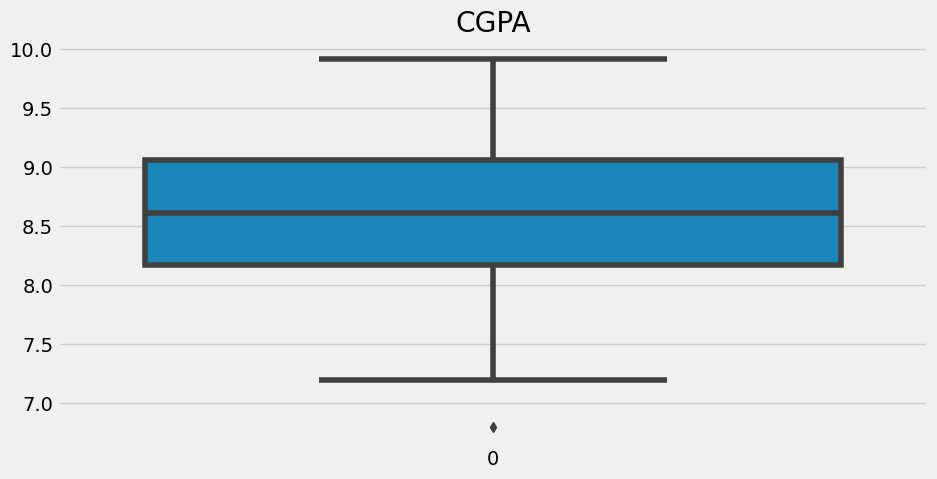

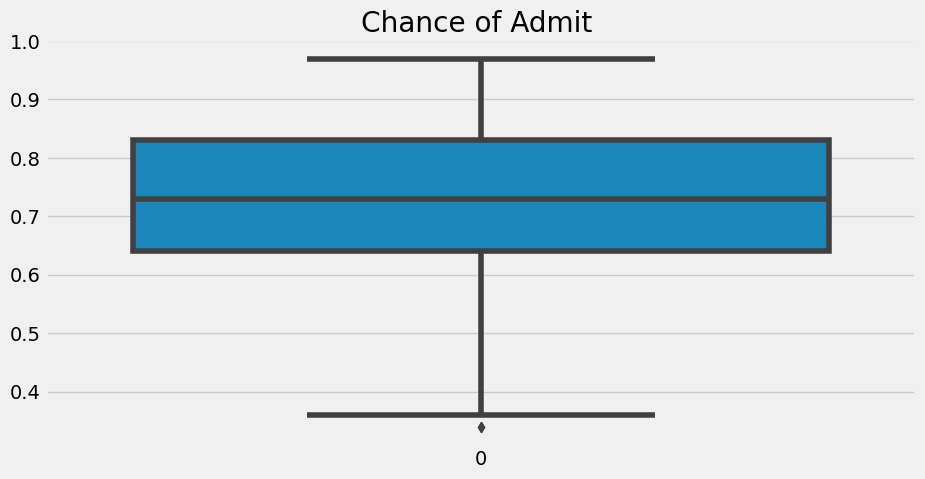

In [ ]:
for i in num:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

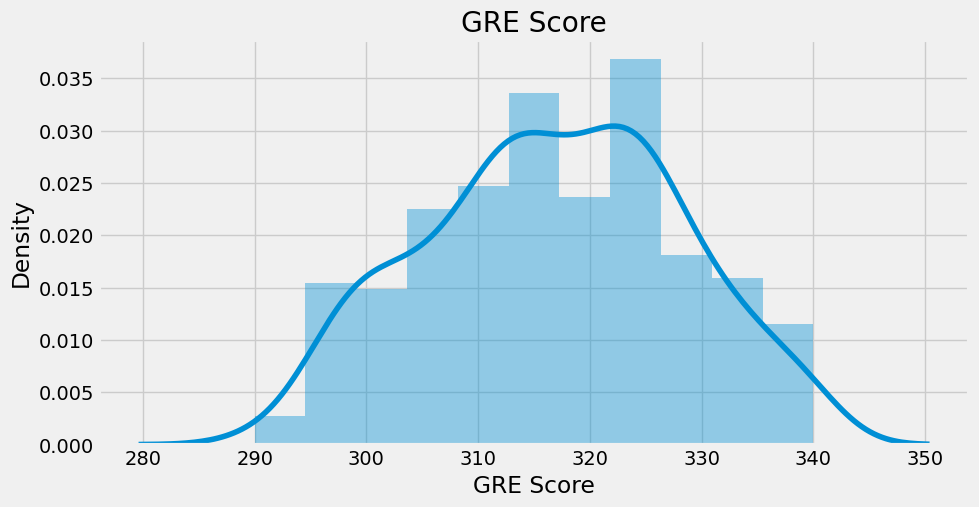

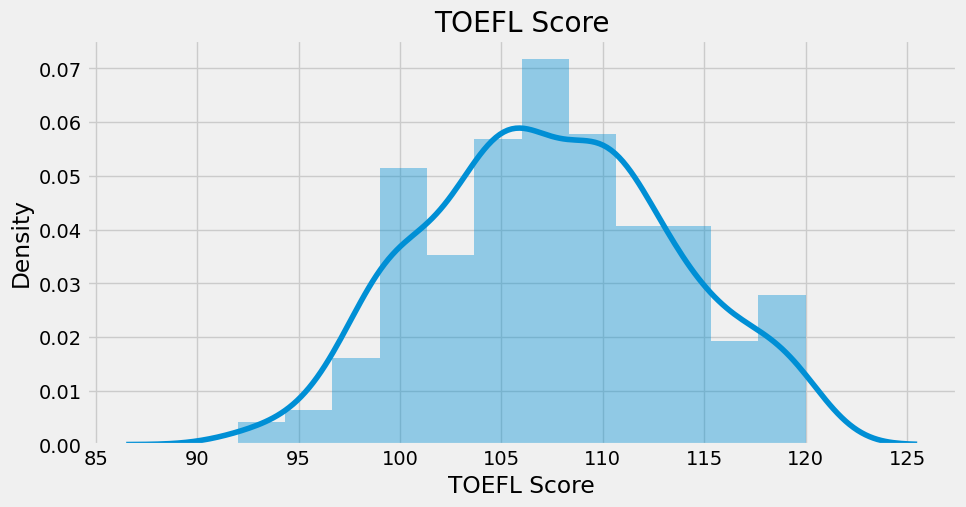

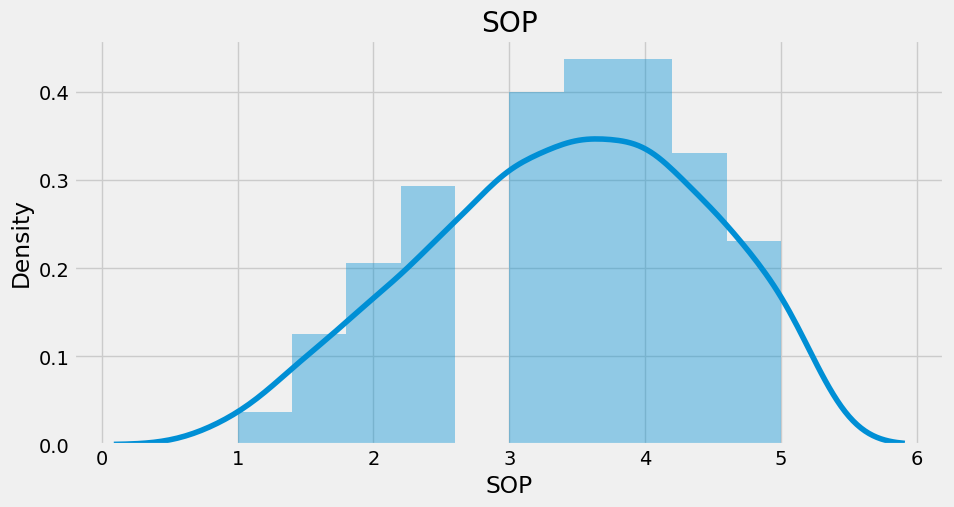

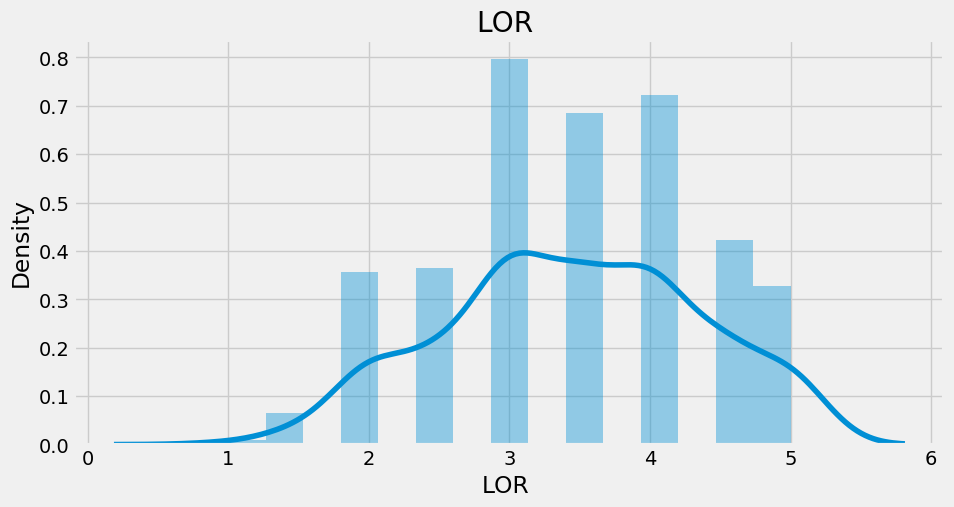

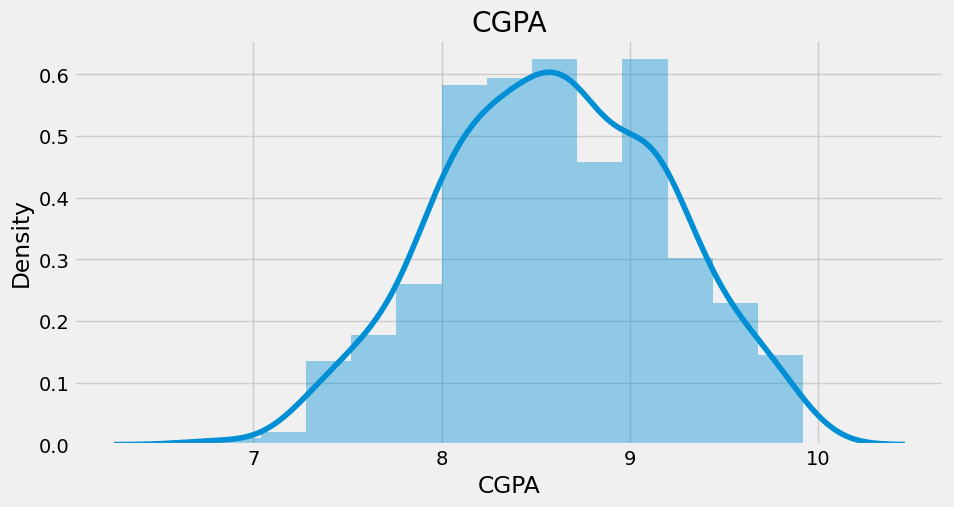

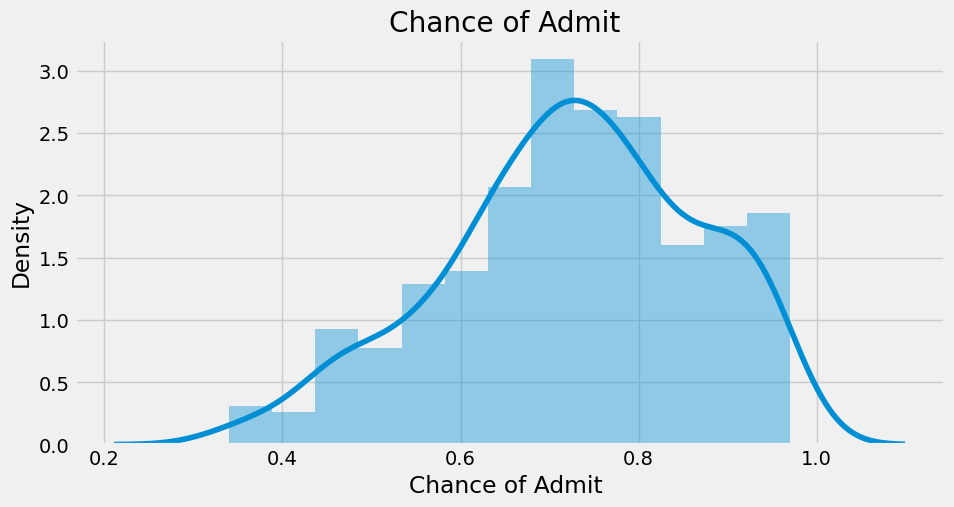

In [ ]:
for i in num:
  sns.distplot(df[i])
  plt.title(i)
  plt.show()

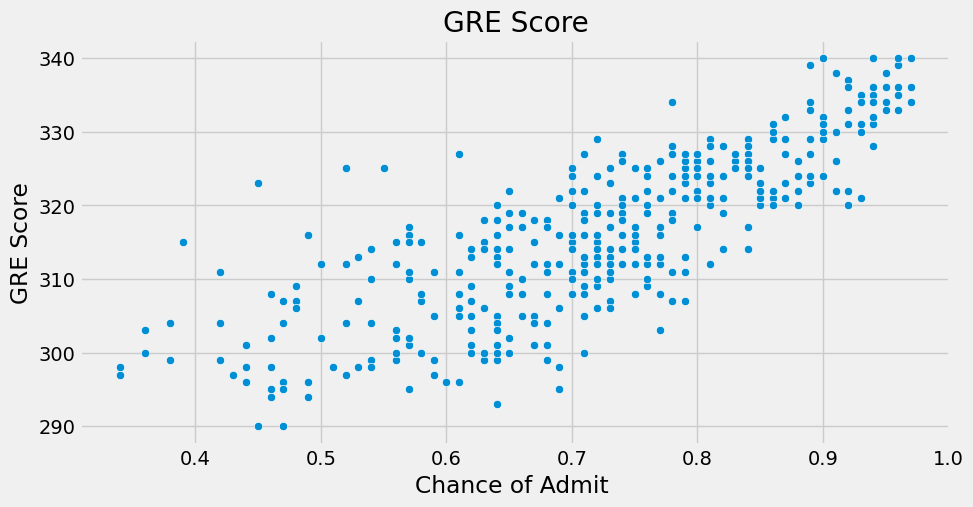

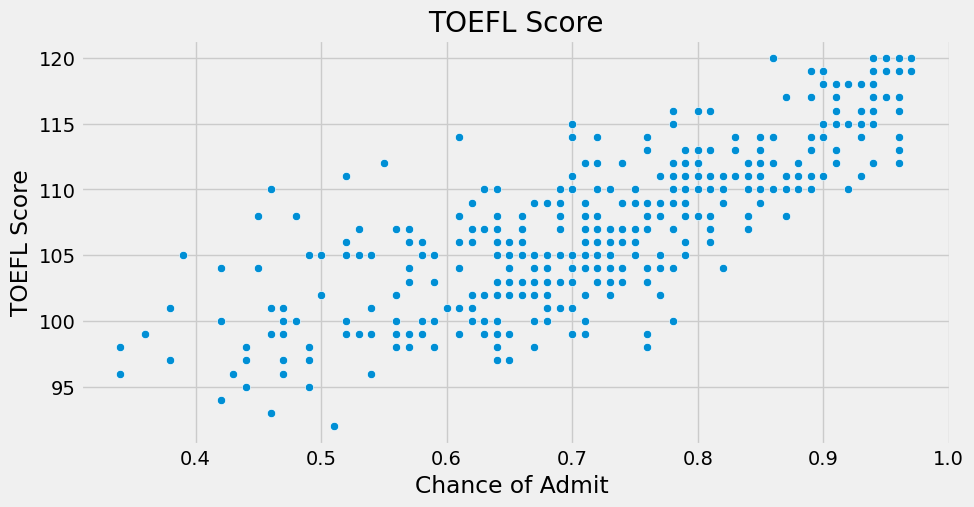

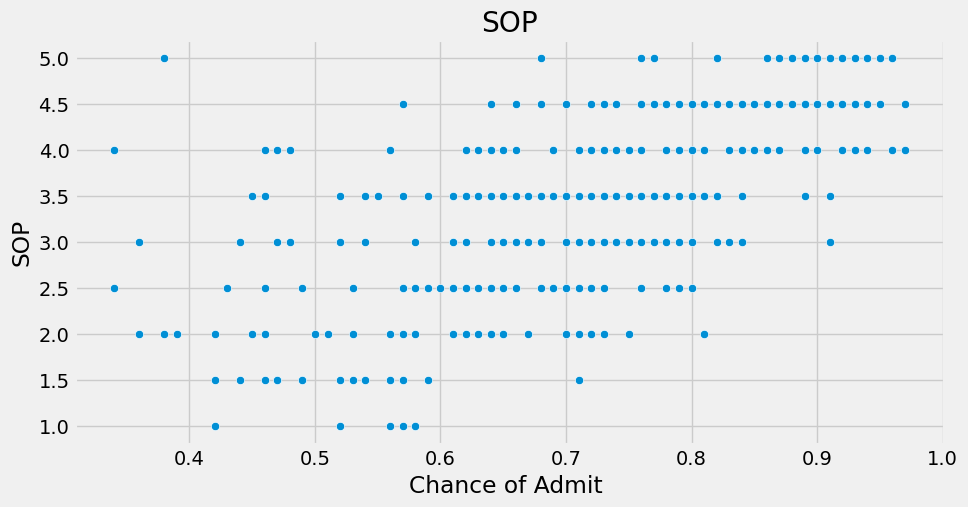

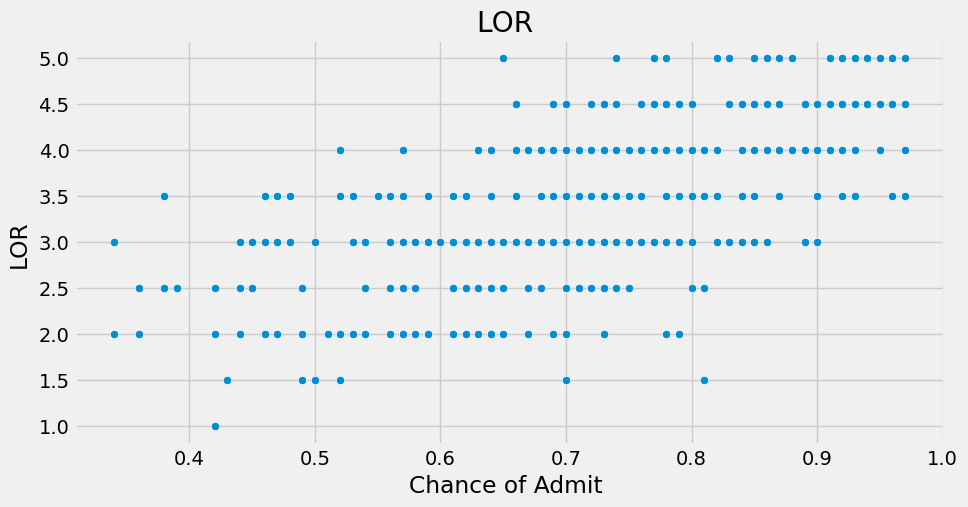

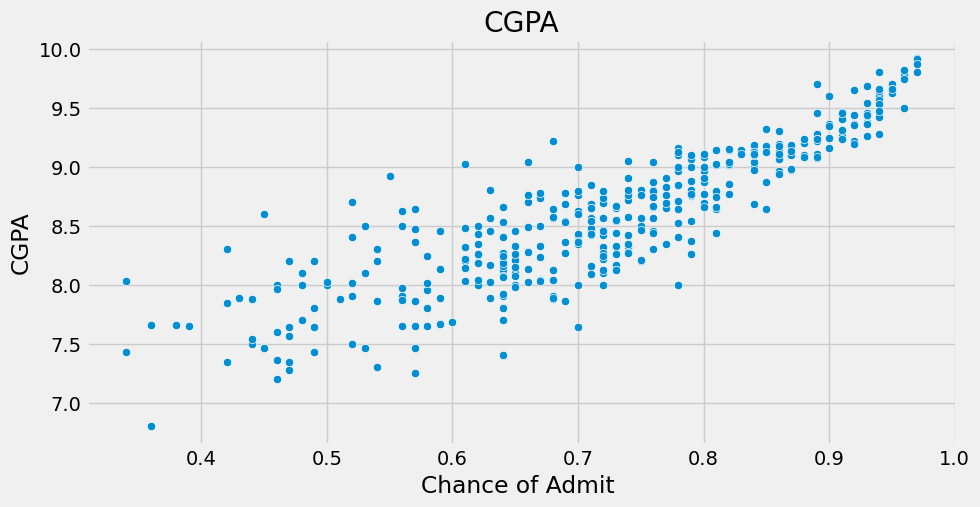

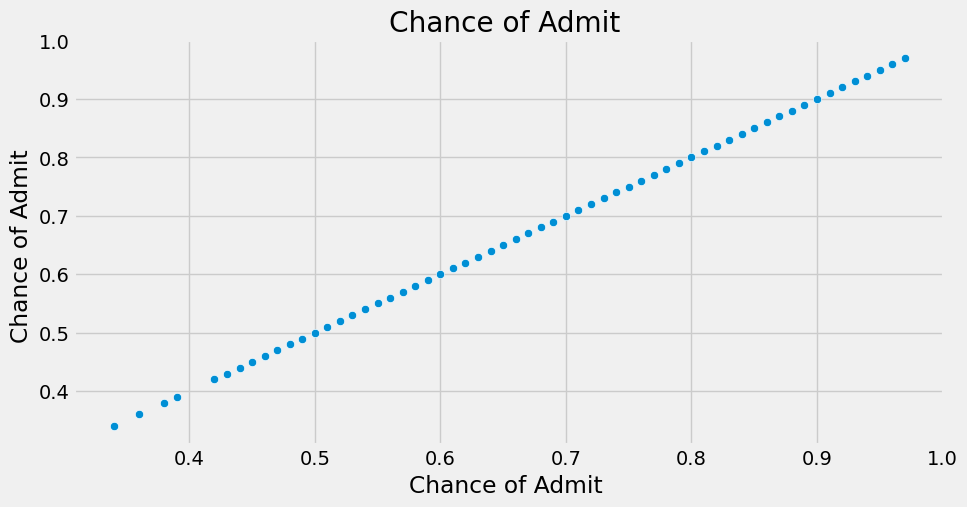

In [ ]:
for i in num:
  sns.scatterplot(x=df['Chance of Admit '],y=df[i])
  plt.title(i)
  plt.show()

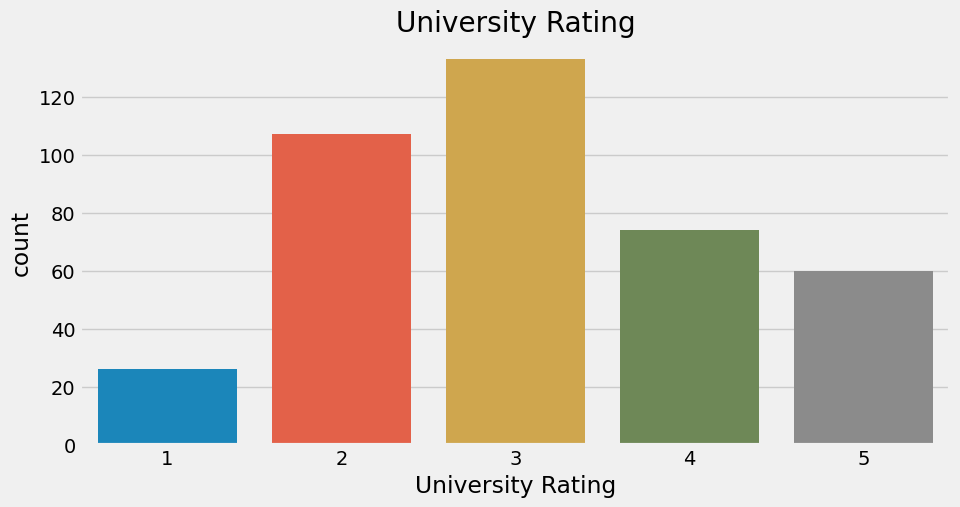

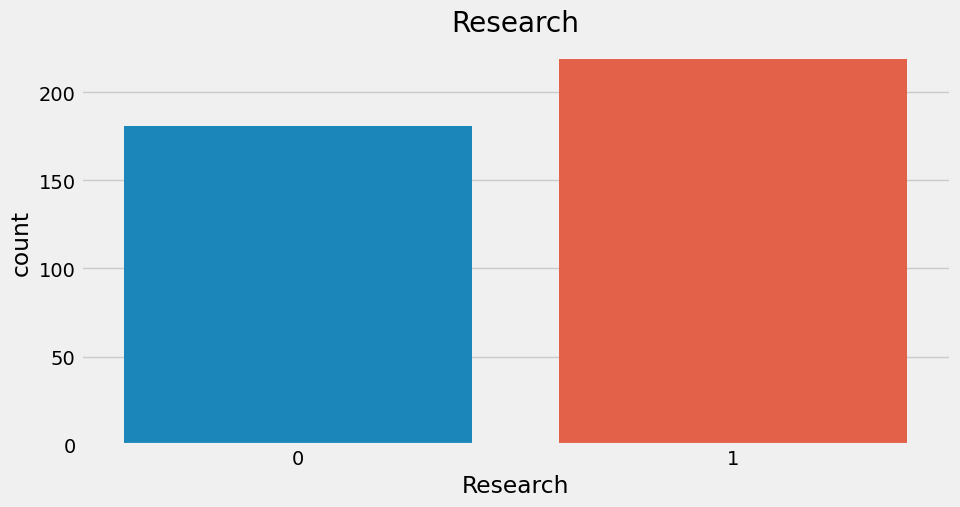

In [ ]:
for i in cat:
  sns.countplot(x=df[i])
  plt.title(i)
  plt.show()

In [ ]:
df[num].skew()

GRE Score          -0.062893
TOEFL Score         0.057216
SOP                -0.275761
LOR                -0.106991
CGPA               -0.065991
Chance of Admit    -0.353448
dtype: float64

In [ ]:
df[num].describe()

GRE Score  TOEFL Score         SOP        LOR         CGPA  \
count  400.000000   400.000000  400.000000  400.000000  400.000000   
mean   316.807500   107.410000    3.400000    3.452500    8.598925   
std     11.473646     6.069514    1.006869    0.898478    0.596317   
min    290.000000    92.000000    1.000000    1.000000    6.800000   
25%    308.000000   103.000000    2.500000    3.000000    8.170000   
50%    317.000000   107.000000    3.500000    3.500000    8.610000   
75%    325.000000   112.000000    4.000000    4.000000    9.062500   
max    340.000000   120.000000    5.000000    5.000000    9.920000   

       Chance of Admit   
count        400.000000  
mean           0.724350  
std            0.142609  
min            0.340000  
25%            0.640000  
50%            0.730000  
75%            0.830000  
max            0.970000

In [ ]:
x=df.drop(columns='Chance of Admit ')
y=df['Chance of Admit ']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((280, 7), (120, 7), (280,), (120,))

In [ ]:
xtrain.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  280.000000   280.000000         280.000000  280.000000  280.000000   
mean   317.139286   107.610714           3.142857    3.423214    3.435714   
std     11.852070     6.295748           1.179706    1.012642    0.898710   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.875000    3.000000   
50%    317.000000   108.000000           3.000000    3.500000    3.500000   
75%    326.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  
count  280.000000  280.000000  
mean     8.609429    0.546429  
std      0.627718    0.498731  
min      6.800000    0.000000  
25%      8.140000    0.000000  
50%      8.630000    1.000000  
75%      9.102500    1.000000  
max      9.920000    1.000000

In [ ]:
xtrain_sc=xtrain.copy()
xtest_sc=xtest.copy()

In [ ]:
num1=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain_sc[num1]=s.fit_transform(xtrain[num1])
xtest_sc[num1]=s.transform(xtest[num1])


In [ ]:
xtrain_sc.describe()

GRE Score   TOEFL Score  University Rating           SOP  \
count  2.800000e+02  2.800000e+02         280.000000  2.800000e+02   
mean  -1.649474e-15  8.532857e-16           3.142857 -6.344132e-17   
std    1.001791e+00  1.001791e+00           1.179706  1.001791e+00   
min   -2.293935e+00 -2.484004e+00           1.000000 -2.397246e+00   
25%   -7.724937e-01 -7.336650e-01           2.000000 -5.423393e-01   
50%   -1.177306e-02  6.194383e-02           3.000000  7.596284e-02   
75%    7.489476e-01  6.984309e-01           4.000000  5.706046e-01   
max    1.932291e+00  1.971405e+00           5.000000  1.559888e+00   

               LOR           CGPA    Research  
count  2.800000e+02  2.800000e+02  280.000000  
mean   2.537653e-16  2.769213e-15    0.546429  
std    1.001791e+00  1.001791e+00    0.498731  
min   -2.715085e+00 -2.887712e+00    0.000000  
25%   -4.856897e-01 -7.491726e-01    0.000000  
50%    7.165914e-02  3.283045e-02    1.000000  
75%    6.290080e-01  7.869049e-01    1.000000  
max    1.743706e+00  2.091573e+00    1.000000

In [ ]:
xtest_sc.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  120.000000   120.000000         120.000000  120.000000  120.000000   
mean    -0.093480    -0.106460           2.958333   -0.076552    0.062370   
std      0.891292     0.875515           1.048375    0.984692    1.003757   
min     -1.955837    -2.006639           1.000000   -2.397246   -2.157736   
25%     -0.645707    -0.733665           2.000000   -0.913321   -0.485690   
50%     -0.054035    -0.097178           3.000000    0.075963    0.071659   
75%      0.579899     0.380187           4.000000    0.570605    0.629008   
max      1.932291     1.971405           5.000000    1.559888    1.743706   

             CGPA   Research  
count  120.000000  120.00000  
mean    -0.055876    0.55000  
std      0.825578    0.49958  
min     -2.089749    0.00000  
25%     -0.593570    0.00000  
50%     -0.070905    1.00000  
75%      0.599384    1.00000  
max      1.931981    1.00000

In [ ]:
import statsmodels.api as sm
ols_model = sm.OLS(ytrain,sm.add_constant(xtrain_sc)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     172.5
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           3.72e-96
Time:                        04:38:13   Log-Likelihood:                 374.06
No. Observations:                 280   AIC:                            -732.1
Df Residuals:                     272   BIC:                            -703.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7044      0.020     35.833      0.000       0.666       0.743
GRE Score             0.0162      0.008      1.931      0.055      -0.000       0.033
TOEFL Score           0.0218      0.008      2.576      0.011       0.005       0.038
University Rating     0.0026      0.006      0.436      0.664      -0.009       0.014
SOP                  -0.0043      0.007     -0.630      0.529      -0.018       0.009
LOR                   0.0231      0.006      3.718      0.000       0.011       0.035
CGPA                  0.0768      0.009      8.222      0.000       0.058       0.095
Research              0.0249      0.010      2.540      0.012       0.006       0.044
==============================================================================
Omnibus:                       61.697   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.543
Skew:                          -1.153   Prob(JB):                     4.93e-26
Kurtosis:                       5.162   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vf=[]
for i in range(len(xtrain_sc.columns)):
    vf.append(VIF(xtrain_sc.values,i))
VIF1=pd.DataFrame(vf,columns=['VIF'],index=xtrain_sc.columns)
VIF1

VIF
GRE Score          4.689896
TOEFL Score        4.694557
University Rating  2.969592
SOP                2.919874
LOR                2.507769
CGPA               5.675005
Research           3.277932

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr=LinearRegression()
lr_model=lr.fit(xtrain_sc,ytrain)
ypred=lr_model.predict(xtest_sc)
print('R2:',r2_score(ytest,ypred))
print('mse:',mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(mean_squared_error(ytest,ypred)))


R2: 0.7605626970382269
mse: 0.00388585293115234
rmse: 0.06233660987856446


In [ ]:
result=pd.DataFrame()
result['Linear']=pd.Series([r2_score(ytest,ypred),mean_squared_error(ytest,ypred),np.sqrt(mean_squared_error(ytest,ypred))])

In [ ]:
from sklearn.linear_model import Ridge
r=Ridge()
r_model=r.fit(xtrain_sc,ytrain)
ypred=r_model.predict(xtest_sc)
print('R2:',r2_score(ytest,ypred))
print('mse:',mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(mean_squared_error(ytest,ypred)))

R2: 0.7609077766317137
mse: 0.003880252598483852
rmse: 0.06229167358872173


In [ ]:
result['Ridge']=pd.Series([r2_score(ytest,ypred),mean_squared_error(ytest,ypred),np.sqrt(mean_squared_error(ytest,ypred))])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=1)
dt_model=dt.fit(xtrain_sc,ytrain)
ypred=dt_model.predict(xtest_sc)
print('R2:',r2_score(ytest,ypred))
print('mse:',mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(mean_squared_error(ytest,ypred)))

R2: 0.5143498627080721
mse: 0.007881666666666665
rmse: 0.088778751211462


In [ ]:
result['DecisionTree']=pd.Series([r2_score(ytest,ypred),mean_squared_error(ytest,ypred),np.sqrt(mean_squared_error(ytest,ypred))])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb_model=gb.fit(xtrain_sc,ytrain)
ypred=gb_model.predict(xtest_sc)
print('R2:',r2_score(ytest,ypred))
print('mse:',mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(mean_squared_error(ytest,ypred)))

R2: 0.719637523261851
mse: 0.004550031839408079
rmse: 0.06745392382514215


In [ ]:
result['GradientBoosting']=pd.Series([r2_score(ytest,ypred),mean_squared_error(ytest,ypred),np.sqrt(mean_squared_error(ytest,ypred))])

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb_model=xgb.fit(xtrain_sc,ytrain)
ypred=xgb_model.predict(xtest_sc)
print('R2:',r2_score(ytest,ypred))
print('mse:',mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(mean_squared_error(ytest,ypred)))


R2: 0.6715727409704602
mse: 0.005330080197963218
rmse: 0.07300739824129619


In [ ]:
result['XGBRegressor']=pd.Series([r2_score(ytest,ypred),mean_squared_error(ytest,ypred),np.sqrt(mean_squared_error(ytest,ypred))])


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor(random_state=1)
ab_model=ab.fit(xtrain_sc,ytrain)
ypred=ab_model.predict(xtest_sc)
print('R2:',r2_score(ytest,ypred))
print('mse:',mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(mean_squared_error(ytest,ypred)))


R2: 0.6783331229335399
mse: 0.005220365254877944
rmse: 0.07225209515908824


In [ ]:
result['AdaBoostRegressor']=pd.Series([r2_score(ytest,ypred),mean_squared_error(ytest,ypred),np.sqrt(mean_squared_error(ytest,ypred))])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1)
rf_model=rf.fit(xtrain_sc,ytrain)
ypred=rf_model.predict(xtest_sc)
print('R2:',r2_score(ytest,ypred))
print('mse:',mean_squared_error(ytest,ypred))
print('rmse:',np.sqrt(mean_squared_error(ytest,ypred)))

R2: 0.7006792991500614
mse: 0.004857706833333326
rmse: 0.06969725126095953


In [ ]:
result['RandomForestRegressor']=pd.Series([r2_score(ytest,ypred),mean_squared_error(ytest,ypred),np.sqrt(mean_squared_error(ytest,ypred))])

In [ ]:
result.rename(index={0:'R2',1:'MSE',2:'RMSE'},inplace=True)

In [ ]:
result

Linear     Ridge  DecisionTree  GradientBoosting  XGBRegressor  \
R2    0.760563  0.760908      0.514350          0.719638      0.671573   
MSE   0.003886  0.003880      0.007882          0.004550      0.005330   
RMSE  0.062337  0.062292      0.088779          0.067454      0.073007   

      AdaBoostRegressor  RandomForestRegressor  
R2             0.678333               0.700679  
MSE            0.005220               0.004858  
RMSE           0.072252               0.069697

In [ ]:
df['Chance of Admit '].value_counts()

0.64    17
0.71    16
0.72    15
0.73    13
0.94    12
0.79    12
0.76    12
0.70    12
0.78    12
0.74    11
0.80    11
0.68    10
0.93     9
0.84     9
0.89     9
0.65     9
0.62     9
0.82     8
0.86     8
0.75     8
0.90     8
0.57     8
0.81     8
0.77     8
0.91     7
0.69     7
0.96     7
0.66     7
0.61     7
0.67     7
0.85     6
0.63     6
0.56     6
0.92     6
0.58     5
0.46     5
0.87     5
0.54     5
0.52     5
0.47     5
0.59     4
0.49     4
0.97     4
0.88     4
0.95     4
0.53     3
0.48     3
0.44     3
0.42     3
0.83     3
0.38     2
0.34     2
0.36     2
0.45     2
0.50     2
0.43     1
0.51     1
0.55     1
0.60     1
0.39     1
Name: Chance of Admit , dtype: int64

(array([ 7., 14., 20., 32., 49., 59., 79., 51., 40., 49.]),
 array([0.34 , 0.403, 0.466, 0.529, 0.592, 0.655, 0.718, 0.781, 0.844,
        0.907, 0.97 ]),
 <BarContainer object of 10 artists>)

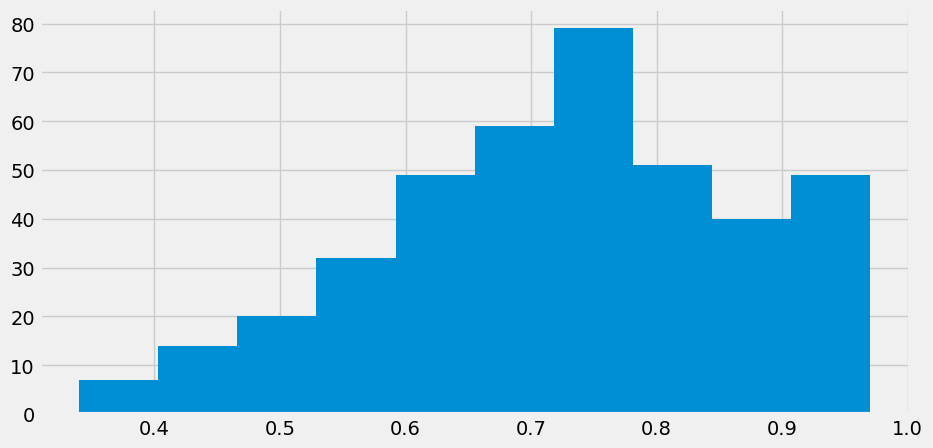

In [ ]:
plt.hist(df['Chance of Admit '])

In [ ]:

chance = df['Chance of Admit ']

bins = [0, 0.75, 1]
labels = ['0', '1']
chance_group = pd.cut(chance, bins=bins, labels=labels)

# print the updated series
print(chance_group.value_counts(normalize=True))

0    0.57
1    0.43
Name: Chance of Admit , dtype: float64


In [ ]:
df['Chance']=chance_group

In [ ]:
df['Chance']=df['Chance'].astype('int64')

In [ ]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   Chance  
0              0.92       1  
1              0.76       1  
2              0.72       0  
3              0.80       1  
4              0.65       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
 8   Chance             400 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
x=df.drop(columns=['Chance of Admit ','Chance'],axis=1)
y=df['Chance']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((280, 7), (120, 7), (280,), (120,))

In [ ]:
xtrain.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  280.000000   280.000000         280.000000  280.000000  280.000000   
mean   317.139286   107.610714           3.142857    3.423214    3.435714   
std     11.852070     6.295748           1.179706    1.012642    0.898710   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.875000    3.000000   
50%    317.000000   108.000000           3.000000    3.500000    3.500000   
75%    326.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  
count  280.000000  280.000000  
mean     8.609429    0.546429  
std      0.627718    0.498731  
min      6.800000    0.000000  
25%      8.140000    0.000000  
50%      8.630000    1.000000  
75%      9.102500    1.000000  
max      9.920000    1.000000

In [ ]:
num1

['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain_sc[num1]=s.fit_transform(xtrain[num1])
xtest_sc[num1]=s.transform(xtest[num1])

In [ ]:
xtrain_sc.describe()

GRE Score   TOEFL Score  University Rating           SOP  \
count  2.800000e+02  2.800000e+02         280.000000  2.800000e+02   
mean  -1.649474e-15  8.532857e-16           3.142857 -6.344132e-17   
std    1.001791e+00  1.001791e+00           1.179706  1.001791e+00   
min   -2.293935e+00 -2.484004e+00           1.000000 -2.397246e+00   
25%   -7.724937e-01 -7.336650e-01           2.000000 -5.423393e-01   
50%   -1.177306e-02  6.194383e-02           3.000000  7.596284e-02   
75%    7.489476e-01  6.984309e-01           4.000000  5.706046e-01   
max    1.932291e+00  1.971405e+00           5.000000  1.559888e+00   

               LOR           CGPA    Research  
count  2.800000e+02  2.800000e+02  280.000000  
mean   2.537653e-16  2.769213e-15    0.546429  
std    1.001791e+00  1.001791e+00    0.498731  
min   -2.715085e+00 -2.887712e+00    0.000000  
25%   -4.856897e-01 -7.491726e-01    0.000000  
50%    7.165914e-02  3.283045e-02    1.000000  
75%    6.290080e-01  7.869049e-01    1.000000  
max    1.743706e+00  2.091573e+00    1.000000

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vf=[]
for i in range(len(xtrain_sc.columns)):
    vf.append(VIF(xtrain_sc.values,i))
VIF1=pd.DataFrame(vf,columns=['VIF'],index=xtrain_sc.columns)
VIF1

VIF
GRE Score          4.689896
TOEFL Score        4.694557
University Rating  2.969592
SOP                2.919874
LOR                2.507769
CGPA               5.675005
Research           3.277932

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain_sc,ytrain)
ypred=LGB_model.predict(xtest_sc)
print('confusion_matrix:\n',confusion_matrix(ytest,ypred))
print('\nclassification_report:\n',classification_report(ytest,ypred))
print('Train score: ',LGB_model.score(xtrain_sc,ytrain))
print('Test score: ',LGB_model.score(xtest_sc,ytest))

confusion_matrix:
 [[67  3]
 [11 39]]

classification_report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        70
           1       0.93      0.78      0.85        50

    accuracy                           0.88       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.88      0.88       120

Train score:  0.8964285714285715
Test score:  0.8833333333333333


In [ ]:
# function to print metrics
def print_metrics(ytest,ypred,model):
    print('Metrics for the model',model)
    print(' ')
    print("Accuracy score is ",accuracy_score(ytest,ypred))
    print(' ')
    print("recall score is ",recall_score(ytest,ypred))
    print(' ')
    print('precision score is',precision_score(ytest,ypred))
    print(' ')
    print('f1 score is', f1_score(ytest,ypred))
    print(' ')
    print(' Roc score is ',roc_auc_score(ytest,ypred))
    print(' ')
    print('Confusion matrix \n', confusion_matrix(ytest,ypred))
    print(' ')
    print('Classification report \n',classification_report(ytest,ypred))

In [ ]:
#lets select the best model based on f1 score and optimize it
import time
clfs={
    'KNN': KNeighborsClassifier(),
    'NaiveBayes':GaussianNB(),
    'Logregs':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier()
}
models_report=pd.DataFrame(columns=['Model','accuracy','F1_score','Train score','Test score','Time_taken'])

for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    start_time = time.time()
    clf.fit(xtrain_sc,ytrain)
    end_time = time.time()
    ypred=clf.predict(xtest_sc)
    print('Fitting the model.....', clf_name)
    t={
        'Model':clf_name,
        'accuracy':accuracy_score(ytest,ypred),
        'F1_score':f1_score(ytest,ypred),
        'Train score':clf.score(xtrain_sc,ytrain),
        'Test score':clf.score(xtest_sc,ytest),
        'Precision score':precision_score(ytest,ypred),
        'Recall score':recall_score(ytest,ypred),
        'Time_taken':end_time - start_time
    }
    
    models_report=models_report.append(t,ignore_index=True)
models_report


Fitting the model..... KNN
Fitting the model..... NaiveBayes
Fitting the model..... Logregs
Fitting the model..... DecisionTree
Fitting the model..... RandomForest
Fitting the model..... AdaBoost
Fitting the model..... GradientBoosting
Fitting the model..... XGBoost


Model  accuracy  F1_score  Train score  Test score  Time_taken  \
0               KNN  0.891667  0.868687     0.903571    0.891667    0.004527   
1        NaiveBayes  0.875000  0.838710     0.882143    0.875000    0.023831   
2           Logregs  0.883333  0.847826     0.896429    0.883333    0.078185   
3      DecisionTree  0.808333  0.757895     1.000000    0.808333    0.006942   
4      RandomForest  0.858333  0.817204     1.000000    0.858333    0.967193   
5          AdaBoost  0.841667  0.804124     0.950000    0.841667    0.837725   
6  GradientBoosting  0.833333  0.787234     1.000000    0.833333    0.861986   
7           XGBoost  0.791667  0.731183     1.000000    0.791667    1.866503   

   Precision score  Recall score  
0         0.877551          0.86  
1         0.906977          0.78  
2         0.928571          0.78  
3         0.800000          0.72  
4         0.883721          0.76  
5         0.829787          0.78  
6         0.840909          0.74  
7         0.790698          0.68

In [ ]:
knn_model=KNeighborsClassifier()
knn_model.fit(xtrain_sc,ytrain)
ypred=knn_model.predict(xtest_sc)
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',knn_model.score(xtrain_sc,ytrain))
print('Test score',knn_model.score(xtest_sc,ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.8916666666666667
f1_score: 0.8686868686868686
Train score 0.9035714285714286
Test score 0.8916666666666667
Precision score 0.8775510204081632
Recall score 0.86


In [ ]:
params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
grid = GridSearchCV(estimator = knn_model, param_grid=params,cv=5,scoring='f1')
grid.fit(xtrain_sc,ytrain)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
leaf_size = list(range(1, 200))
n_neighbors = list(range(1, 50))
p = [1, 2, 3]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_model = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_model, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(xtrain_sc,ytrain)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 14


In [ ]:
knn_model=KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=14)
knn_model.fit(xtrain_sc,ytrain)
ypred=knn_model.predict(xtest_sc)
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',knn_model.score(xtrain_sc,ytrain))
print('Test score',knn_model.score(xtest_sc,ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.8666666666666667
f1_score: 0.8333333333333333
Train score 0.8892857142857142
Test score 0.8666666666666667
Precision score 0.8695652173913043
Recall score 0.8


In [ ]:
knn_model=KNeighborsClassifier(leaf_size=1,p=3,n_neighbors=14)
knn_model.fit(xtrain_sc,ytrain)
ypred=knn_model.predict(xtest_sc)
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',knn_model.score(xtrain_sc,ytrain))
print('Test score',knn_model.score(xtest_sc,ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.8916666666666667
f1_score: 0.8659793814432989
Train score 0.8892857142857142
Test score 0.8916666666666667
Precision score 0.8936170212765957
Recall score 0.84
